In [2]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np 
from matplotlib import pyplot as plt
from sportsreference.ncaab.roster import Roster 
from sportsreference.ncaab.player import AbstractPlayer

In [3]:
years = [str(i) for i in range(1953, 2020)]
duke_df = pd.DataFrame(columns=['Player', 'MinutesPlayed', 'PersonalFouls'])

In [4]:
for y in years:
    duke = Roster('DUKE', year=y, slim=False)
    for x in duke.players:
        duke_df = duke_df.append({'Player': x.name, 'MinutesPlayed': x.minutes_played, 'PersonalFouls': x.personal_fouls}, ignore_index=True)

In [5]:
duke_df.head()

,Player,MinutesPlayed,PersonalFouls
0,Bernie Janicki,None,249
1,Bill Reigel,None,93
2,Rudy D'Emilio,None,212
3,Rudy Lacy,None,159
4,Marv Decker,None,83


In [6]:
duke_df.shape   #(891,3)

(891, 3)

In [7]:
duke_noDupes = duke_df.drop_duplicates()  #drop duplicates for players on multiple rosters
duke_noDupes.shape   #(336,3)

(336, 3)

In [8]:
duke_noDupes.fillna(value=np.nan, inplace=True)

In [10]:
duke_noNA = duke_noDupes.dropna()  #drop players with missing data
duke_noNA.shape    #(181,3)

(181, 3)

In [11]:
duke_noNA['FoulsPerMin'] = duke_noNA['PersonalFouls']/duke_noNA['MinutesPlayed']   #calc FPM feature

In [12]:
duke_noNA = duke_noNA.sort_values('FoulsPerMin', ascending=False)
duke_noNA.head()

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin
633,Matt Christensen,133.0,89.0,0.669173
470,Dave Colonna,2.0,1.0,0.500000
582,Jay Heaps,15.0,7.0,0.466667
634,Casey Sanders,832.0,218.0,0.262019
389,Mac Dyke,4.0,1.0,0.250000


In [13]:
duke_noNA['FPMrank'] = duke_noNA['FoulsPerMin'].rank(ascending=False)  #create ranks for each player by FPM

In [14]:
duke_noNA.describe()

,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank
count,181.000000,181.000000,181.000000,181.000000
mean,1606.519337,148.116022,0.108833,91.000000
std,1396.120429,120.049355,0.075789,52.391952
min,2.000000,0.000000,0.000000,1.000000
25%,292.000000,46.000000,0.071366,46.000000
50%,1210.000000,125.000000,0.095154,91.000000
75%,2705.000000,249.000000,0.130159,136.000000
max,4887.000000,432.000000,0.669173,177.500000


In [15]:
duke_noNA['FoulsPerMin'].describe(percentiles=[0.99, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.75, 0.5])   #see detailed percentiles

count    181.000000
mean       0.108833
std        0.075789
min        0.000000
50%        0.095154
75%        0.130159
90%        0.170765
91%        0.173741
92%        0.180013
93%        0.185709
94%        0.194119
95%        0.201342
99%        0.473333
max        0.669173
Name: FoulsPerMin, dtype: float64

In [16]:
duke_noNA.head(20)

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank
633,Matt Christensen,133.0,89.0,0.669173,1.0
470,Dave Colonna,2.0,1.0,0.500000,2.0
582,Jay Heaps,15.0,7.0,0.466667,3.0
634,Casey Sanders,832.0,218.0,0.262019,4.0
389,Mac Dyke,4.0,1.0,0.250000,5.5
580,Baker Perry,4.0,1.0,0.250000,5.5
648,Reggie Love,274.0,68.0,0.248175,7.0
401,Jay Bryan,244.0,57.0,0.233607,8.0
350,Jim Suddath,629.0,132.0,0.209857,9.0
330,Mike Gminski,1192.0,240.0,0.201342,10.0


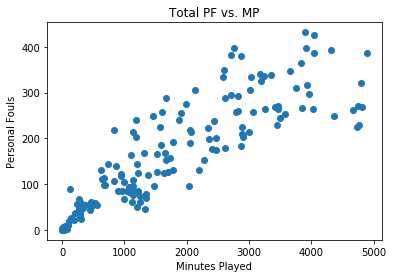

In [17]:
%matplotlib inline
plt.scatter(x='MinutesPlayed',y='PersonalFouls',data=duke_noNA)
plt.xlabel('Minutes Played')
plt.ylabel('Personal Fouls')
plt.title('Total PF vs. MP')
plt.show()

In [18]:
duke_noNA['Foulrank'] = duke_noNA['PersonalFouls'].rank(ascending=False)   #rank personal fouls

In [19]:
duke_noNA['Minrank'] = duke_noNA['MinutesPlayed'].rank(ascending=False)   #rank minutes played
duke_noNA.head(20)

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank,Foulrank,Minrank
633,Matt Christensen,133.0,89.0,0.669173,1.0,108.5,145.0
470,Dave Colonna,2.0,1.0,0.500000,2.0,170.5,180.5
582,Jay Heaps,15.0,7.0,0.466667,3.0,150.0,169.5
634,Casey Sanders,832.0,218.0,0.262019,4.0,58.0,118.0
389,Mac Dyke,4.0,1.0,0.250000,5.5,170.5,177.5
580,Baker Perry,4.0,1.0,0.250000,5.5,170.5,177.5
648,Reggie Love,274.0,68.0,0.248175,7.0,122.5,139.0
401,Jay Bryan,244.0,57.0,0.233607,8.0,129.0,141.0
350,Jim Suddath,629.0,132.0,0.209857,9.0,85.5,125.0
330,Mike Gminski,1192.0,240.0,0.201342,10.0,49.0,94.0


In [20]:
duke_noNA = duke_noNA.sort_values('PersonalFouls', ascending=False)   #top 5 personal fouls list
duke_noNA.head()

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank,Foulrank,Minrank
672,Shelden Williams,3903.0,432.0,0.110684,60.0,1.0,16.0
486,Christian Laettner,4048.0,425.0,0.104990,72.0,2.0,10.0
657,Dahntay Jones,3907.0,398.0,0.101868,80.0,3.0,15.0
730,Lance Thomas,2758.0,397.0,0.143945,34.0,4.0,45.0
448,Danny Ferry,4307.0,394.0,0.091479,99.0,5.0,9.0


In [21]:
duke_noNA.loc[duke_noNA['Player'] == 'Javin DeLaurier']   #pull Javin's record

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank,Foulrank,Minrank
859,Javin DeLaurier,1464.0,250.0,0.170765,19.0,45.0,82.0
